In [1]:
import pandas as pd
from jupyter_datatables import init_datatables_mode
import matplotlib as plt
from tqdm.notebook import tqdm

#init_datatables_mode()

#print(pd.options.display.max_rows)

#col = ['UF', 'NOME MUNICÍPIO', 'NOME FAVORECIDO', 'VALOR PARCELA']
colunas_selecionadas_bolsa_familia = ['UF','NOME MUNICÍPIO','VALOR PARCELA']

tqdm.pandas()

# uri do arquivo zip
uri='https://portaldatransparencia.gov.br/download-de-dados/novo-bolsa-familia/202306'

df = pd.read_csv('/root/datasets/202306_NovoBolsaFamilia.csv',
                 delimiter=';',
                 encoding = 'ISO-8859-1',
                 nrows=100000,
                 usecols=colunas_selecionadas_bolsa_familia
                 )
df.columns = ['UF', 'Municipio', 'Valor']

# troca ,00 por '' 
df['Valor'] = df['Valor'].str.replace(',00', '')

# converte a coluna VALOR para número inteiro
df['Valor'] = df['Valor'].astype(int)

df.head

<bound method NDFrame.head of        UF            Municipio  Valor
0      AC           ACRELANDIA    850
1      AC           ACRELANDIA    600
2      AC           ACRELANDIA    750
3      AC           ACRELANDIA    600
4      AC           ACRELANDIA    700
...    ..                  ...    ...
99995  AC  SANTA ROSA DO PURUS   1202
99996  AC  SANTA ROSA DO PURUS   1536
99997  AC  SANTA ROSA DO PURUS    776
99998  AC  SANTA ROSA DO PURUS   1636
99999  AC  SANTA ROSA DO PURUS   1394

[100000 rows x 3 columns]>

In [45]:
Municipios=df['Municipio'].unique()
print(Municipios)
type(Municipios)

['ACRELANDIA' 'ASSIS BRASIL' 'BRASILEIA' 'BUJARI' 'CAPIXABA'
 'CRUZEIRO DO SUL' 'EPITACIOLANDIA' 'FEIJO' 'JORDAO' 'MANCIO LIMA'
 'MANOEL URBANO' 'MARECHAL THAUMATURGO' 'PLACIDO DE CASTRO' 'PORTO ACRE'
 'PORTO WALTER' 'RIO BRANCO' 'RODRIGUES ALVES' 'SANTA ROSA DO PURUS'
 'SENA MADUREIRA' 'SENADOR GUIOMARD' 'TARAUACA' 'XAPURI' 'AGUA BRANCA'
 'ANADIA' 'ARAPIRACA' 'ATALAIA' 'BARRA DE SANTO ANTONIO'
 'BARRA DE SAO MIGUEL' 'BATALHA' 'BELEM' 'BELO MONTE' 'BOCA DA MATA'
 'BRANQUINHA' 'CACIMBINHAS' 'CAJUEIRO' 'CAMPESTRE' 'CAMPO ALEGRE'
 'CAMPO GRANDE' 'CANAPI' 'CAPELA' 'CARNEIROS' 'CHA PRETA' 'COITE DO NOIA'
 'COLONIA LEOPOLDINA' 'COQUEIRO SECO' 'CORURIPE' 'CRAIBAS'
 'DELMIRO GOUVEIA' 'DOIS RIACHOS' 'ESTRELA DE ALAGOAS' 'FEIRA GRANDE'
 'FELIZ DESERTO' 'FLEXEIRAS' 'GIRAU DO PONCIANO' 'IBATEGUARA' 'IGACI'
 'IGREJA NOVA' 'INHAPI' 'JACARE DOS HOMENS' 'JACUIPE' 'JAPARATINGA'
 'JARAMATAIA' 'JEQUIA DA PRAIA' 'JOAQUIM GOMES' 'JUNDIA' 'JUNQUEIRO'
 'LAGOA DA CANOA' 'LIMOEIRO DE ANADIA' 'MACEIO' 'MAJOR IS

numpy.ndarray

In [3]:
df.describe()

,Valor
count,100000.000000
mean,731.655560
std,217.943897
min,180.000000
25%,600.000000
50%,700.000000
75%,800.000000
max,2746.000000


In [80]:
tqdm.pandas()

# Serie com Quantidade de Pagamentos em cada cidade e ordena pelo indice
Quantidade_Pagamentos_por_Municipio=df['Municipio'].value_counts().sort_index().progress_apply(lambda x: x**2)
Quantidade_Pagamentos_por_Municipio.columns = ['Municipio','Quantidade']

type(Quantidade_Pagamentos_por_Municipio)
print(Total_Pagamentos_por_Municipio.shape)
Quantidade_Pagamentos_por_Municipio.head()
Quantidade_Pagamentos_por_Municipio

  0%|          | 0/162 [00:00<?, ?it/s]

(162,)


ACRELANDIA              5271616
AGUA BRANCA            10355524
ALVARAES                9381969
AMATURA                 3617604
ANADIA                 11505664
                        ...    
TEOTONIO VILELA        39175081
TRAIPU                 25381444
UNIAO DOS PALMARES    136492489
VICOSA                 20757136
XAPURI                  7203856
Name: Municipio, Length: 162, dtype: int64

In [77]:
# # Serie com Total de Pagamentos em cada cidade e ordenação decrescente pelo valor
#Total_Pagamentos_por_Municipio=df.groupby(['Municipio'])['Valor'].sum().sort_values('Valor', ascending=False).progress_apply(lambda x: x**2)
Total_Pagamentos_por_Municipio=df.groupby(['Municipio'])['Valor'].sum().progress_apply(lambda x: x**2)
type(Total_Pagamentos_por_Municipio)
print(Total_Pagamentos_por_Municipio.shape)

Total_Pagamentos_por_Municipio

  0%|          | 0/162 [00:00<?, ?it/s]

(162,)


Municipio
ACRELANDIA             2792458234225
AGUA BRANCA            5648384416689
ALVARAES               6203810655025
AMATURA                2694210374025
ANADIA                 4953170727184
                           ...      
TEOTONIO VILELA       18008989690000
TRAIPU                12319699863249
UNIAO DOS PALMARES    64605617968644
VICOSA                 9920364414921
XAPURI                 3918899303641
Name: Valor, Length: 162, dtype: int64

In [81]:
# merge both series 
#teste = pd.merge(Quantidade_Pagamentos_por_Municipio, Total_Pagamentos_por_Municipio, right_index = True,  left_index = True)
#teste.columns = ['Municipio', 'Quantidade', 'Total']

teste = pd.merge(Quantidade_Pagamentos_por_Municipio, Total_Pagamentos_por_Municipio, right_index = True,  left_index = True)
#teste = pd.merge(Quantidade_Pagamentos_por_Municipio, Total_Pagamentos_por_Municipio,  on='Municipio', how='inner')
#teste = pd.concat(Quantidade_Pagamentos_por_Municipio, Total_Pagamentos_por_Municipio)
type(teste)
print(teste.shape)


teste.to_csv('output.csv', index=True)
teste



(162, 2)


,Municipio,Valor
ACRELANDIA,5271616,2792458234225
AGUA BRANCA,10355524,5648384416689
ALVARAES,9381969,6203810655025
AMATURA,3617604,2694210374025
ANADIA,11505664,4953170727184
...,...,...
TEOTONIO VILELA,39175081,18008989690000
TRAIPU,25381444,12319699863249
UNIAO DOS PALMARES,136492489,64605617968644
VICOSA,20757136,9920364414921


In [102]:
Municipios_Pagamentos_Quantidade.describe()

count    1.800000e+01
mean     5.775952e+13
std      1.985688e+14
min      1.575904e+10
25%      2.404725e+12
50%      3.322592e+12
75%      9.926168e+12
max      8.478566e+14
Name: Valor, dtype: float64

<Axes: ylabel='Frequency'>

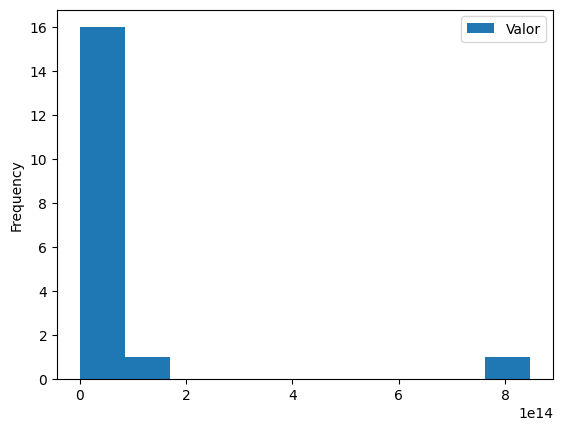

In [82]:
#Total_Pagamentos_por_Municipio.plot()
Total_Pagamentos_por_Municipio.plot(kind='hist')

<Axes: >

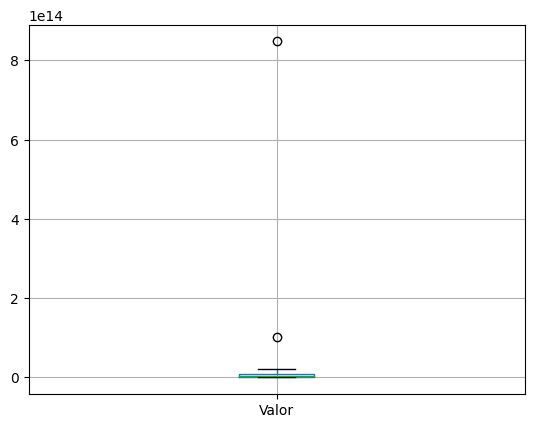

In [83]:
Total_Pagamentos_por_Municipio.boxplot()

In [84]:
# https://www.kdnuggets.com/2022/09/progress-bars-python-tqdm-fun-profit.html

from time import sleep
from tqdm.notebook import trange

for i in trange(10, desc='Traning Model on 10 Epochs'):
    sleep(0.01)
    for x in trange(100, desc=f'Epoch {i}'):
        sleep(0.001)

Traning Model on 10 Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/100 [00:00<?, ?it/s]